# Polynomial Regression

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

C:\Users\mdaza\AppData\Local\Temp\ipykernel_9280\296970491.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.DataFrame({'Position' : ["B.Analyst" , 'J.Consultant' , 'S.Consultant' , 'Manager' , 'Country Manager' , 'Region Manager' , 'Partner' , 'S.Partner' , 'C-level' , 'CEO'] , 'Level' : [1,2,3,4,5,6,7,8,9,10] , 'Salary': [45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]})

In [3]:
df

,Position,Level,Salary
0,B.Analyst,1,45000
1,J.Consultant,2,50000
2,S.Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,S.Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x = df.iloc[:,1:2]
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
y = df.iloc[:,2]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

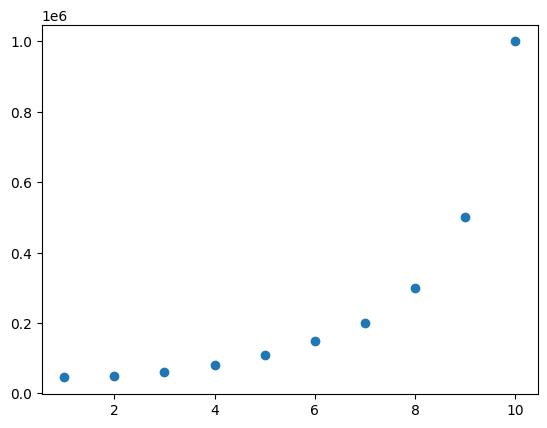

In [6]:
plt.scatter(x,y)


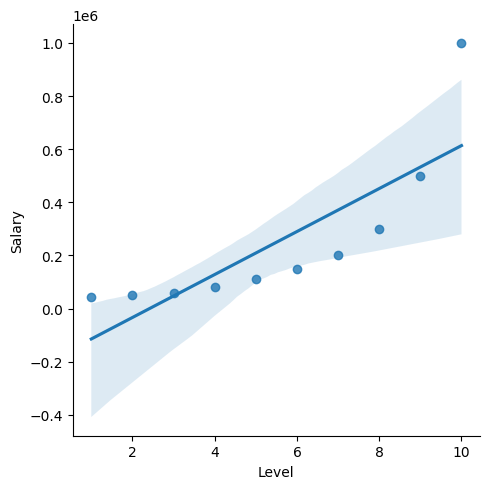

In [7]:
sns.lmplot(x='Level', y='Salary', data=df)

In [8]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [9]:
reg.fit(x,y)

LinearRegression()

In [10]:
reg.predict([[6.5]])

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330378.78787879])

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)


In [12]:
poly_x = poly.fit_transform(x)

poly_x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [13]:
reg2 = linear_model.LinearRegression()
reg2.fit(poly_x , y)

LinearRegression()

In [14]:
reg2.predict(poly.fit_transform([[6.5]]))

array([189498.10606061])

# Polynomial Regeression

In [15]:
df

,Position,Level,Salary
0,B.Analyst,1,45000
1,J.Consultant,2,50000
2,S.Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,S.Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
df.corr(numeric_only=True)

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

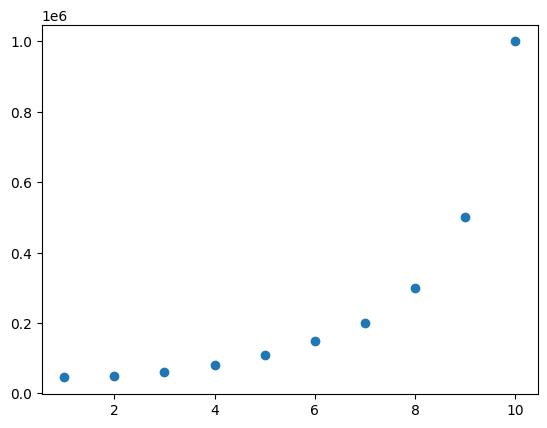

In [17]:
plt.scatter(df['Level'] , df['Salary'])
plt.show

In [18]:
x = df[['Level']]
y = df['Salary']

In [19]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

pf.fit(x)
x = pf.transform(x)

print(x)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [20]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
model.score(x_test , y_test)*100

70.54806877204658

In [24]:
prd = model.predict(x)

In [25]:
model.coef_

array([      0.        , -139971.87636522,   20859.81869812])

In [26]:
model.intercept_

225018.02096985382

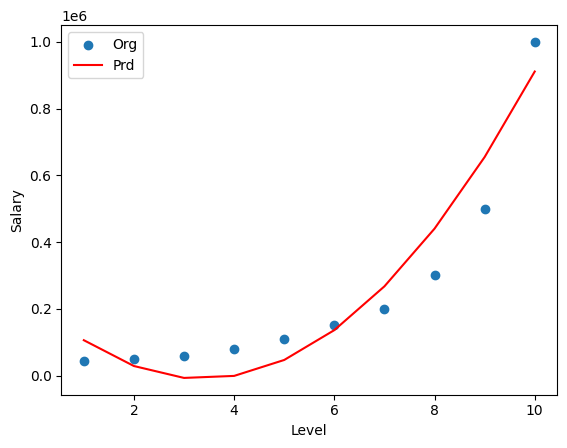

In [27]:
plt.scatter(df['Level'] , df['Salary'])
plt.plot(df['Level'] , prd , color='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend(['Org', 'Prd'])
plt.show()

In [28]:
test  = pf.transform([[4]])

test

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.,  4., 16.]])

In [29]:
model.predict(test)

array([-1112.3853211])

In [35]:
model.score(x_test, y_test)*100 , model.score(x_train , y_train)*100

(70.54806877204658, 93.35151712990286)